## In this notebook we import all the csv for the experiments on how the IC-MAP-Elites adapt overtime.
In this notebook we import all the different csv files stored for the expressive range test, create the respective folders and create all the plots related to eac pair of dimensions, and we plot leniency/linearity.

In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import os as os
import os.path
from os import path
from numpy import genfromtxt
from os import listdir
import matplotlib as mpl

Read all the CSV that exist in the specified folder... Create all the folders for each csv

In [329]:
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/nya/Using-all-dims/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/nya/main-room/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/dif-target-room/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/dif-target-room/target/'
# CSVFilesDirectory = '../../../../my-data/expressive-range/copy/less-gens/'

# savePlotsDirectory = '../../../../my-data/expressive-range/copy/nya/'

CSVFilesDirectory = '../../../../../../../phd-related/conferences/COG2020/ICMAPE-analysis/Experiments/Experiment-LIN-HIGH/'
#CSVFilesDirectory = '../../../../../../../phd-related/conferences/COG2020/ICMAPE-analysis/Experiments/Sym-High/'

savePlotsDirectory = CSVFilesDirectory

In [330]:
filenames = listdir(CSVFilesDirectory)
csvFiles = [ filename for filename in filenames if filename.endswith( ".csv" ) ]
print(csvFiles)

['custom-unique-overtime_0eaba8dc-e899-468a-825f-8f346a11aab8.csv', 'custom-unique-overtime_13ab135a-a76a-4ae6-adff-2cb84608274a.csv', 'custom-unique-overtime_204ccb6b-f9f4-49e8-975f-6cdc0a0d510d.csv', 'custom-unique-overtime_2e6ffa6e-45c5-46c3-beb3-0773009ab328.csv', 'custom-unique-overtime_3a135191-6aa2-4995-980a-e3f6111472c6.csv', 'custom-unique-overtime_517ace9e-169a-4fca-8d1a-60b66827231f.csv', 'custom-unique-overtime_601edf66-9ce4-45a6-b5a8-591807bb416a.csv', 'custom-unique-overtime_67019cc5-a145-4206-b00a-cccfc9421c71.csv', 'custom-unique-overtime_7c2c948a-4414-45af-93ed-e617aaaf783c.csv', 'custom-unique-overtime_7d0449a0-1bb7-4c37-b539-cc99d54c6e4c.csv', 'custom-unique-overtime_871f476a-cc0e-41ee-ab4e-b66fd9e75757.csv', 'custom-unique-overtime_9dffbb6b-3f01-40f3-96d1-8a043d5b7c50.csv', 'custom-unique-overtime_af66f8a9-195d-4db5-a246-d1c4dd93f286.csv', 'custom-unique-overtime_b043b531-ba27-4f5c-b435-32b209dafce6.csv', 'custom-unique-overtime_c4879372-e2ff-4ded-bd76-2606ee816792.

In [331]:
for file in csvFiles:
    dirName = file.split(".")[0]

In [332]:
customColor = mpl.colors.LinearSegmentedColormap.from_list('custom', 
                                             [(0,    [0.13,0.13,0.13]),
                                              (1,    'white')], N=126)

In [333]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hexbin(x, y, color, max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    #ax.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    #ax.apply_aspect(left=0.07, right=0.93, top=0.9, bottom=0.1)
    a=ax.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #cax = divider.append_axes("bottom", size="5%", pad=0.05)

    plt.colorbar(a, cax=cax)

    #cbar_ax = a.get_figure().add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(a)

In [334]:
def getDimensionName(rawDim):
    switcher = {
        "LENIENCY":"Leniency",
        "INNER_SIMILARITY":"Inner Similarity",
        "SYMMETRY":"Symmetry",
        "SIMILARITY":"Similarity",
        "LINEARITY":"Linearity",
        "NUMBER_MESO_PATTERN":"NMesoPatterns",
        "NUMBER_PATTERNS":"NSpatialPatterns"
    }
    return switcher.get(rawDim)

C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


30
Similarity
Inner Similarity


<Figure size 3600x3600 with 0 Axes>

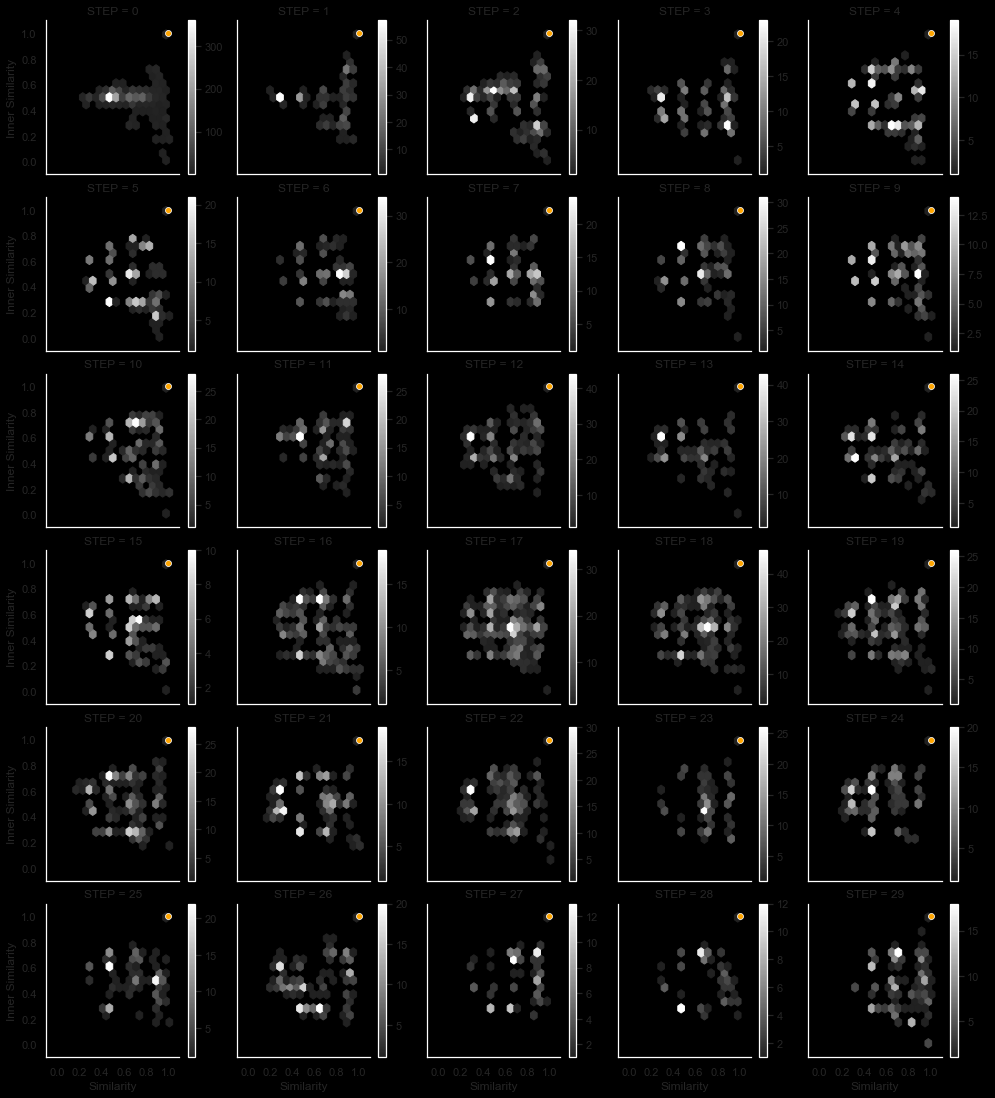

In [324]:
##DONE! Now i must have this like "static"
experiment_room = pd.read_csv(CSVFilesDirectory + csvFiles[len(csvFiles) - 1], sep=';')
experiment_room = experiment_room[pd.notnull(num_data['Leniency'])]
experiment_room = experiment_room.round(2)
experiment_room = experiment_room.drop(columns=['Score'])
experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0

print(len(experiment_room))

for file in csvFiles:
#     sns.set()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    #plt.rcParams['text.color'] = "white"
    #plt.rcParams['axes.labelcolor'] = "white"
    #plt.rcParams['xtick.color'] = "white"
    #plt.rcParams['ytick.color'] = "white"

    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    
    num_data = num_data.append(experiment_room, ignore_index=True)
    
    ##DIMENSIONS USED!!
    x_var = getDimensionName(num_data['DIM X'][0])
    y_var = getDimensionName(num_data['DIM Y'][0])
    print(x_var)
    print(y_var)
    
    # Create an array with the colors you want to use
    colors = ['orange']# Set your custom color palette
    
    plt.figure(1, figsize=(50,50))
    fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
    #fitness_figure.set(xmargin=0.05, ymargin=0.15)
    fitness_figure.map(hexbin, x_var, y_var, min_series=num_data.min(), max_series=num_data.max(), color="gray")
    
    #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)
    
    fitness_figure.map(sns.scatterplot, x_var, y_var, hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)
    
    #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(cax=cbar_ax)
    #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
    #plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
    fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
    
    plt.show()
    
    #     fitness_figure.savefig('../../../../my-data/expressive-range/copy/nya/_LEN-LIN_' + dirName + ".png")
    if not path.exists(savePlotsDirectory + x_var + '_' + y_var + '/'):
            os.makedirs(savePlotsDirectory + x_var + '_' + y_var + '/')
            
    fitness_figure.savefig(savePlotsDirectory + x_var + '_' + y_var + '/' + x_var + '_' + y_var +".png")
    
    break

In [343]:
def getFolderName(rawDim):
    switcher = {
        "Leniency":"len",
        "Inner Similarity":"is",
        "Symmetry":"sym",
        "Similarity":"sim",
        "Linearity":"lin",
        "NMesoPatterns":"mesoPat",
        "NSpatialPatterns":"spaPat",
        "Fitness":"fit"
    }
    return switcher.get(rawDim)

In [346]:
##DONE! Now i must have this like "static"
experiment_room = pd.read_csv(CSVFilesDirectory + csvFiles[len(csvFiles) - 1], sep=';')
experiment_room = experiment_room[pd.notnull(num_data['Leniency'])]
experiment_room = experiment_room.round(2)
experiment_room = experiment_room.drop(columns=['Score'])
experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0

for file in csvFiles:
#     sns.set()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    #plt.rcParams['text.color'] = "white"
    #plt.rcParams['axes.labelcolor'] = "white"
    #plt.rcParams['xtick.color'] = "white"
    #plt.rcParams['ytick.color'] = "white"
    
    dirName = file.split(".")[0]
    
    if dirName == 'experimentRoom':
        continue
    
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    
    num_data = num_data.append(experiment_room, ignore_index=True)
    
    ##DIMENSIONS USED!!
    x_var = getDimensionName(num_data['DIM X'][0])
    y_var = getDimensionName(num_data['DIM Y'][0])
    print(x_var)
    print(y_var)
    
    # Create an array with the colors you want to use
    colors = ['orange']# Set your custom color palette
    
    testVars = ["Leniency",
                "Fitness",
                "Linearity",
                "Similarity",
                "NMesoPatterns",
                "NSpatialPatterns",
                "Symmetry",
                "Inner Similarity"
               ]
    filename_dims = dirName.split("-")
    
    #Create pairs 
    for i in range(0,8):
        for j in range(i,8):
            
            if i == j:
                continue
    
            plt.figure(1, figsize=(50,50))
            fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
            #fitness_figure.set(xmargin=0.05, ymargin=0.15)
            fitness_figure.map(hexbin, testVars[i], testVars[j], min_series=num_data.min(), max_series=num_data.max(), color="gray")

            #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)

            fitness_figure.map(sns.scatterplot,testVars[i], testVars[j], hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)

            #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
            #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
            #plt.colorbar(cax=cbar_ax)
            #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
            #plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
            fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
            fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
            #plt.show()

            
            if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
                os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

            fitness_figure.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/__'
                                         + "X-" + getFolderName(testVars[i])+ "-Y-" + getFolderName(testVars[j]) + ".png")
            plt.close()

C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Inner Similarity
Leniency
Linearity
NSpatialPatterns
Symmetry
NSpatialPatterns
Symmetry
Leniency
Similarity
Leniency
Leniency
Linearity
Symmetry
Linearity
Inner Similarity
NSpatialPatterns
Similarity
Linearity
Leniency
NMesoPatterns
Linearity
NMesoPatterns
Inner Similarity
NMesoPatterns
Symmetry
Inner Similarity
Leniency
NSpatialPatterns
Similarity
Inner Similarity
NMesoPatterns
NSpatialPatterns
Similarity
NSpatialPatterns
Similarity
NMesoPatterns
Inner Similarity
Linearity
Symmetry
Similarity
Symmetry
NMesoPatterns


<Figure size 3600x3600 with 0 Axes>

C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Inner Similarity
Leniency


<Figure size 3600x3600 with 0 Axes>

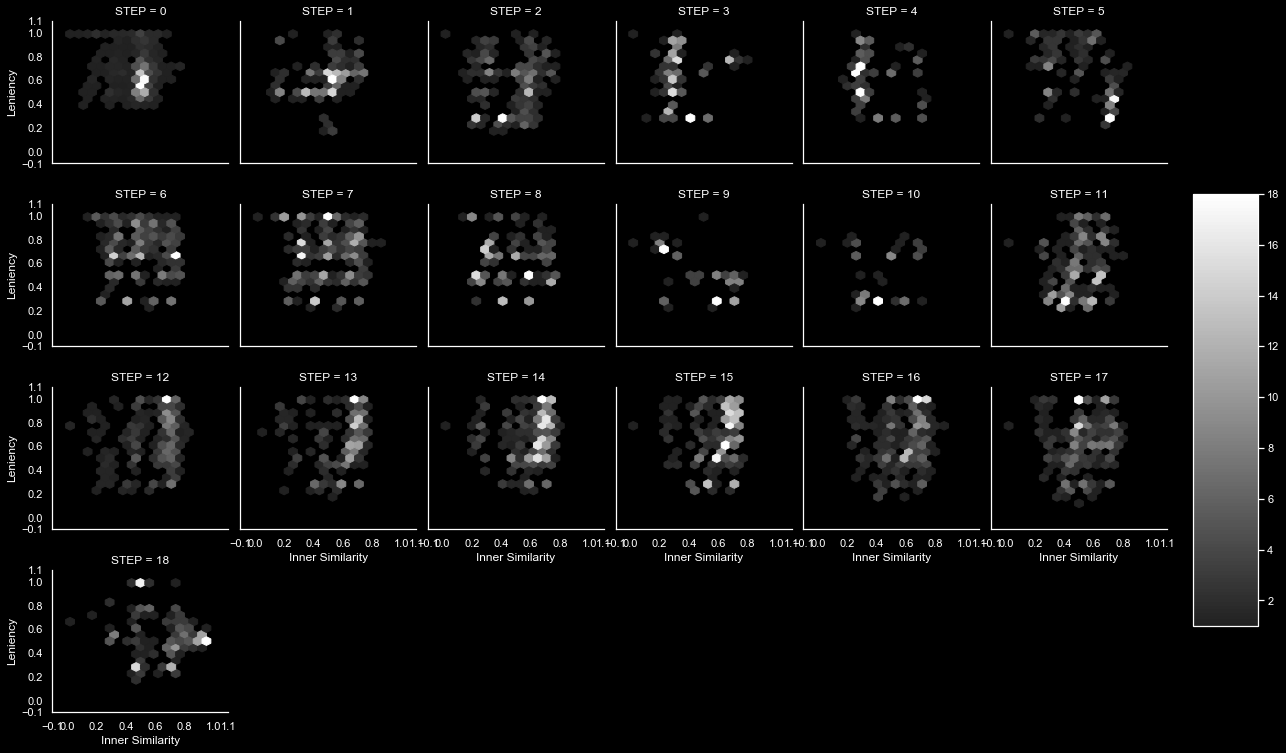

In [183]:
for file in csvFiles:
#     sns.set()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    plt.rcParams['text.color'] = "white"
    plt.rcParams['axes.labelcolor'] = "white"
    plt.rcParams['xtick.color'] = "white"
    plt.rcParams['ytick.color'] = "white"

    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    
    ##DIMENSIONS USED!! -- must change this!" "
    x_var = getDimensionName(num_data['DIM X'][0])
    y_var = getDimensionName(num_data['DIM Y'][0])
    
    print(x_var)
    print(y_var)
    
#     with sns.axes_style("dark"):
    plt.figure(figsize=(50, 50))
#    fitness_figure = sns.relplot(x="Linearity", y="Leniency", col="STEP", col_wrap=5, data=num_data)
#    fitness_figure = sns.PairGrid(num_data, y_vars=["Leniency"], x_vars=["Linearity"], height=4)
    fitness_figure = sns.FacetGrid(num_data, col="STEP", col_wrap=6)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
#     fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    fitness_figure.map(hexbin, x_var, "Leniency", min_series=num_data.min(), max_series=num_data.max(), color="gray")
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .05, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
#     plt.gca().set_facecolor('xkcd:salmon')
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    
#     fitness_figure.savefig('../../../../my-data/expressive-range/copy/nya/_LEN-LIN_' + dirName + ".png")
#     fitness_figure.savefig(savePlotsDirectory + '_LEN-LIN_' + dirName + ".png")
    break